# ORIE 4580/5580/5581 Assignment 3

#### Students: Gundeep Singh (gs722)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [52]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

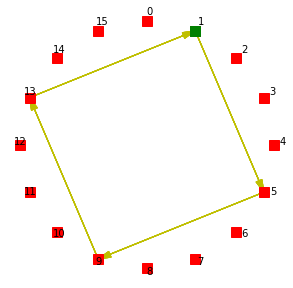

In [10]:
# Ans
m1 = 16
a1 = 5
c1 = 0
seed1 = 1

fig = plt.figure(figsize=(5,5))
x1 = LCG(n=m1+1,m=m1,a=a1,c=c1,seed = seed1)

plot_clock_face(m1,fig,annotate = True)
plot_clock_path(m1,x1,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

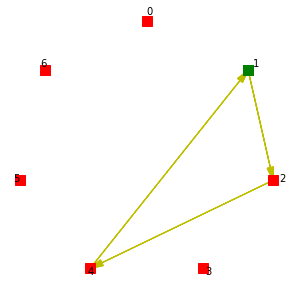

In [9]:
# Ans
m2 = 7
a2 = 2
c2 = 0
seed2 = 1

fig = plt.figure(figsize=(5,5))
x2 = LCG(n=m2+1,m=m2,a=a2,c=c2,seed = seed2)

plot_clock_face(m2,fig,annotate = True)
plot_clock_path(m2,x2,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

In [12]:
# Function to generate pseudorandom sequence using LCG
def LCGcomb(n, m1=2**31-1, a1=1103515245, c1=12345, seed1=1, m2=2**31-1, a2=1103515245, c2=12345,  seed2=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m_i (int): The modulus value (default is 2^31-1, following glibc specifications) for the rv x_i
    a_i (int): The multiplier value (default is 1103515245, following glibc specifications) or the rv x_i
    c_i (int): The increment value (default is 12345, following glibc specifications) or the rv x_i
    seed_i (int): The initial seed value (default is 1) for the rv x_i
    
    Note: m1>m2! 
    
    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x1 = seed1
    x2 = seed2
    for i in range(n):

        # Update the LCG state using the specified parameters
        x1 = (a1 * x1 + c1) % m1
        x2 = (a2 * x2 + c2) % m2

        z1 = x1+x2
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (z1 + 1.0) / (m1 + 1.0)

    return output

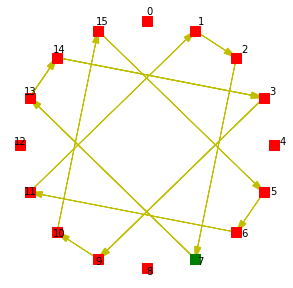

In [13]:
fig = plt.figure(figsize=(5,5))
z1= LCGcomb(n=m1+1,m1=m1,a1=a1,c1=c1,seed1=seed1,m2=m2,a2=a2,c2=c2,seed2=seed2)

plot_clock_face(m1,fig,annotate = True)
plot_clock_path(m1,z1,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

Period of $x_1 = 4$

Period of $y_1 = 3$

Period of $z_1 = 12$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

$$F^{-1}(y)=
	\begin{cases}
	y & \mbox{for $0 \leq y < \frac{1}{2}$}\\
	1 & \mbox{for $\frac{1}{2} \leq y \leq 1$}, \\
	 \end{cases}$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

pmf: $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$

cdf: $P(k) = (1-(1-p)^k)\,\forall\,k\in\{1,2,3,\ldots\}$

inverse: $P^{-1}(u) = k$ when $ (1-(1-p)^{(k-1)}) \leq u < (1-(1-p)^{k}), \forall\,k\in\{1,2,3,\ldots\}$

$ (1-(1-p)^{(k-1)}) \leq u < (1-(1-p)^{k})$

$ (1-p)^{k} < (1-u) \leq (1-p)^{(k-1)}$

$ k \log(1-p) < \log(1-u) \leq (k-1)\log(1-p) $

$ k  < \frac{\log(1-u)}{\log(1-p)} \leq (k-1) $

Therefore, $P^{-1}(u) =$ ceil $(\frac{\log(1-u)}{\log(1-p)})$

In [174]:
def geom_rv(p):
    """
    Generate a random variable from a geometric distribution using the inverse transformation method.

    Parameters:
    p (float): The probability of success (0 < p <= 1).

    Returns:
    int: The generated random variable following a geometric distribution.
    """
    if p <= 0 or p > 1:
        raise ValueError("p must be in the range (0, 1]")
    
    u = np.random.rand()  # Generate a random number between 0 and 1
    X = math.ceil(math.log(1 - u) / math.log(1 - p))
    return X

pval=0.42
rvarr = np.zeros(1000)
for i in range(1000):
     rvarr[i] = geom_rv(pval)

Text(0.5, 1.0, 'Sampling Via Inversion Transformation')

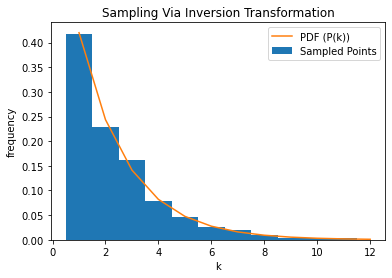

In [175]:

narr =np.arange(max(rvarr))+1
fig, ax = plt.subplots(1, 1)
#ax.hist(r, bins =max(r),  density=True);
ax.hist(r, bins=np.arange(0.5,max(rvarr)+0.5,1),  density=True, label ='Sampled Points');
#ax.plot(narr, p*(1-p)**(narr-1), 'ro', ms=12, mec='r')
#ax.vlines(narr, 0, p*(1-p)**(narr-1), colors='r', lw=4)
ax.plot(narr, p*(1-p)**(narr-1), label ='PDF (P(k)) ')
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('frequency')
ax.set_title('Sampling Via Inversion Transformation')

Text(0.5, 1.0, 'Sampling Via Scipy.Stats.Geom')

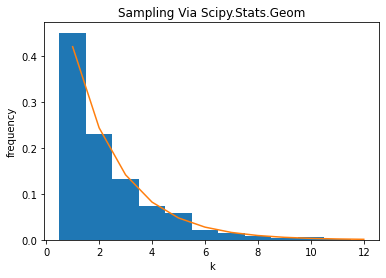

In [176]:
from scipy.stats import geom
p=0.42
r = geom.rvs(p, size=1000)
narr =np.arange(max(r))+1
fig, ax = plt.subplots(1, 1)
#ax.hist(r, bins =max(r),  density=True);
ax.hist(r, bins=np.arange(0.5,max(r)+0.5,1),  density=True, label ='Sampled Points');
#ax.plot(narr, p*(1-p)**(narr-1), 'ro', ms=12, mec='r')
#ax.vlines(narr, 0, p*(1-p)**(narr-1), colors='r', lw=4)
ax.plot(narr, p*(1-p)**(narr-1),  label ='PDF (P(k)) ')
ax.set_xlabel('k')
ax.set_ylabel('frequency')
ax.set_title('Sampling Via Scipy.Stats.Geom')

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

$$
F(x) = \begin{cases}
0 & \text{if } x < 0 \\
\exp(x - 2) - \exp(-2) & \text{if } 0 \leq x \leq 2 \\
1-\exp(-x)  & \text{if } x > 2
\end{cases}
$$


$$
F^{-1}(u) = \begin{cases}
\log(u+ \exp(-2)) + 2 & \text{if } 0 \leq u \leq 1-\exp(2) \\
\log(\frac{1}{1-u})  & \text{if } u > 1-\exp(2)
\end{cases}
$$

Text(0.5, 1.0, 'Sampling Via Inversion Transformation')

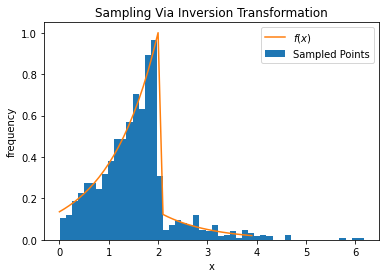

In [177]:
rvarr =np.zeros(1000)
for i in range(1000):
    rvuni = np.random.rand()
    if rvuni <=1-np.exp(-2):
        rvarr[i] = np.log(rvuni +np.exp(-2))+2
    else:
        rvarr[i] =np.log(1/(1-rvuni))
fig, ax = plt.subplots(1, 1)
ax.hist(rvarr,density=True, bins =50, label='Sampled Points' )    

def pdfoff(x):
    y = np.zeros_like(x)  # Initialize y as an array of zeros of the same shape as x
    y[x >= 0] = np.exp(x[x >= 0] - 2)
    y[x > 2] = np.exp(-x[x > 2])
    return y
xarr = np.arange(0,4,0.1)
ax.plot(xarr,pdfoff(xarr) , label='$f(x)$' )
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('Sampling Via Inversion Transformation')

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


Text(0.5, 1.0, 'Sampling Via Acceptance-Rejection')

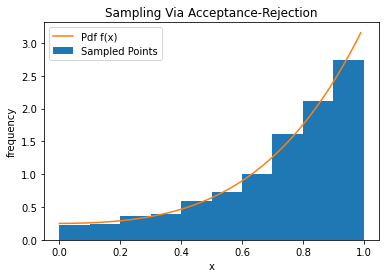

In [180]:
max_m  = (5+4+3+1)/4
size=10000;
z1 = np.random.rand(size)
z2 = np.random.rand(size)*max_m

samp_ind =np.zeros(size) 

def func(x):
    return (5*x**4 +4*x**3 +3*x**2+1)/4

xarr = np.arange(0,1,0.01)
fig, ax = plt.subplots(1, 1)
ax.hist(z1[z2<=func(z1)], density=True, label='Sampled Points')
ax.plot(np.arange(0,1,0.01),func(xarr), label='Pdf f(x)')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('Sampling Via Acceptance-Rejection')


___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

In [185]:
2*max_m

6.5

### Ans.
For one sample of X, need 6.5 instances of np.random.rand()

___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


Points sampled:2512


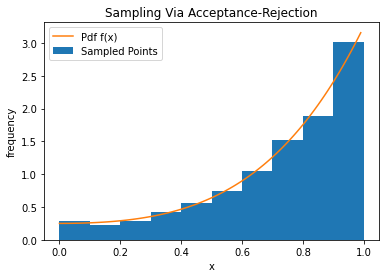

In [188]:
size=np.int64(2500*max_m);

z1 = np.random.rand(size)
z2 = np.random.rand(size)*max_m

samp_ind =np.zeros(size) 

def func(x):
    return (5*x**4 +4*x**3 +3*x**2+1)/4

xarr = np.arange(0,1,0.01)
fig, ax = plt.subplots(1, 1)
ax.hist(z1[z2<=func(z1)], density=True, label='Sampled Points')
ax.plot(np.arange(0,1,0.01),func(xarr), label='Pdf f(x)')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('Sampling Via Acceptance-Rejection')
print('Points sampled:' + repr(sum(z2<=func(z1))))

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

CDF:

$$F(x) = \begin{cases} e^{x}/2  & \text{ for } x \leq 0, \\
1-e^{-x}/2 & \text{ for } x \geq 0 \end{cases}$$

Inverse:

$$F^{-1}(u) = \begin{cases} \log(2u)  & \text{ for } u \leq 1/2, \\
\log(\frac{1}{2(1-u)}) & \text{ for } u \geq 1/2 \end{cases}$$


In [259]:
def laplace_rv():
    """
    Generate a random variable from a laplace distribution using the inverse transformation method.

    Returns:
    int: The generated random variable following a laplace distribution.
    """
    
    u = np.random.rand()  # Generate a random number between 0 and 1
    if u<=0.5:
        X = np.log(2*u)
    else:
        X = np.log(1/(2*(1-u)))
    
    return X

rvarr = np.zeros(1000)
for i in range(1000):
     rvarr[i] = laplace_rv()

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.


$k \frac{\exp\left(-x\right)}{2} \geq \frac{\exp\left(-\frac{x^{2}}{2}\right)}{\sqrt{\left(2\pi\right)}}$


$k \geq \frac{\exp\left(-\frac{x^{2}}{2}+x\right)}{\left(\sqrt{\frac{\pi}{2}}\right)}$

Smallest value of k for kg(x)>=f(x) is k = 1.315489246958914


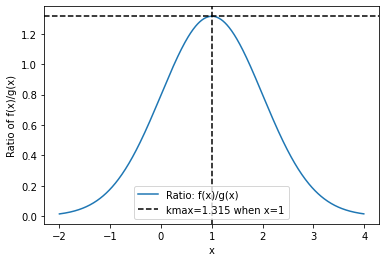

In [260]:
def funcratio(x):
    return np.exp(-x**2/2 + x)/np.sqrt(np.pi/2)

xarr =np.arange(-2,4,0.01)
plt.plot (xarr, funcratio(xarr), label='Ratio: f(x)/g(x)' )
plt.axvline(x = 1, color = 'k',linestyle="--",  label = 'kmax=1.315 when x=1')
plt.axhline(y = funcratio(1), color = 'k',linestyle="--")
plt.xlabel('x')
plt.ylabel('Ratio of f(x)/g(x)')
plt.legend()
k_m  = funcratio(1)
print('Smallest value of k for kg(x)>=f(x) is k = ' + repr(k_m))

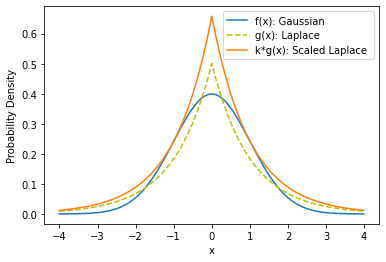

In [261]:
def funcgauss(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
def funclap(x):
    return np.exp(-np.abs(x))/2

xarr =np.arange(-4,4,0.01)
plt.plot (xarr, funcgauss(xarr), label='f(x): Gaussian ')
plt.plot (xarr, funclap(xarr), 'y--', label='g(x): Laplace ')
plt.plot (xarr, k_m*funclap(xarr), label='k*g(x): Scaled Laplace ')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()


We can exploit the fact that Gaussian distribution is contained within our Scaled Laplace dist to sample from Gaussian dist. The scheme for the acceptance-rejection algorithm is described below. The average number of samples needed to generate one accepted sample: 2*k ~ 2.631

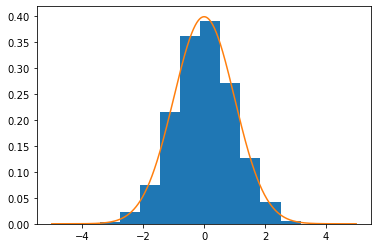

In [262]:

k_m  = funcratio(1)
size=10000;
z1 =np.zeros(size)
for i in range(size):
     z1[i] = laplace_rv()

z2 = k_m *funclap(z1)*np.random.rand(size)

xarr = np.arange(-5,5,0.01)
plt.hist(z1[z2<=funcgauss(z1)], density=True)
plt.plot(xarr,funcgauss(xarr))

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

Points sampled:995


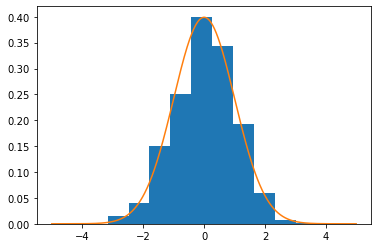

In [277]:
k_m  = funcratio(1)
size= math.ceil(k_m*1000);

z1 =np.zeros(size)
for i in range(size):
     z1[i] = laplace_rv()
z2 = k_m *funclap(z1)*np.random.rand(size)

xarr = np.arange(-5,5,0.01)
plt.hist(z1[z2<=funcgauss(z1)], density=True)
plt.plot(xarr,funcgauss(xarr))
print('Points sampled:' + repr(sum(z2<=funcgauss(z1))))

In [326]:
histtrial = np.zeros(1000)
for j in range(1000):
    size=2000
    z1 =np.zeros(size)
    for i in range(size):
         z1[i] = laplace_rv()
    z2 = k_m *funclap(z1)*np.random.rand(size)
    succ1000 = np.zeros(size)
    succ1000[z2<=funcgauss(z1)] =1
    anss = np.where(abs(np.cumsum(succ1000)-1000)<1e-2)[0]
    histtrial[j]= anss[0]
  

The mean and the 95% CI for the number of uniform samples needed is provided below

In [325]:
print(repr(np.mean(2*histtrial)) +'+/-' +repr(2*np.std(2*histtrial, ddof=1)/np.sqrt(1000)))

3038.998+/-3.6257603508949847


___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

CDF:

$F(x) = \frac{1}{2} + \frac{\tan^{-1}(x)}{\pi}$

Inverse:

$F^{-1}(u) = \tan(\pi(y-\frac{1}{2}))$


Text(0.5, 1.0, 'Sampling Via Inversion Transformation')

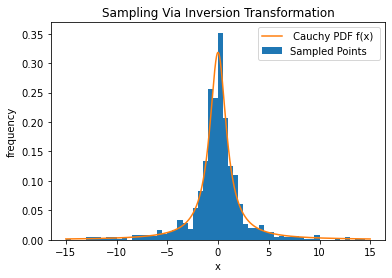

In [316]:
def cauchy_rv():
    """
    Generate a random variable from a Cauchy distribution using the inverse transformation method.

    Returns:
    int: The generated random variable following a Cauchy distribution.
    """    
    return np.tan(np.pi*(np.random.rand()-0.5))

rvarr = np.zeros(1000)
for i in range(1000):
     rvarr[i] = cauchy_rv()
        
def funccauchy(x):
    return 1/(np.pi*(1+x**2))

xarr = np.arange(-15,15,0.01)
fig, ax = plt.subplots(1, 1)
ax.hist(rvarr, bins=np.arange(-15,15,0.5) , density=True, label ='Sampled Points');
ax.plot(xarr, funccauchy(xarr), label =' Cauchy PDF f(x) ')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('Sampling Via Inversion Transformation')

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $

$g(x) = \frac{1}{\pi(1+x^2)}$

$kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$

$k \frac{1}{\pi(1+x^2)} \geq \frac{e^{-x^2/2}}{\sqrt{2\pi}} , \forall\,x\in\mathbb{R}$

$k \geq \pi(1+x^2) \frac{e^{-x^2/2}}{\sqrt{2\pi}} , \forall\,x\in\mathbb{R}$

Smallest value of k for kg(x)>=f(x) is k = 1.520346901066281


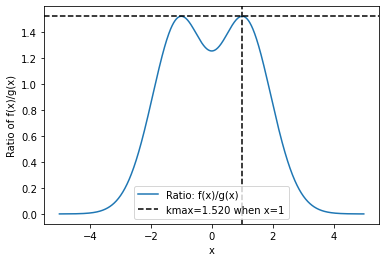

In [317]:
def funcratio(x):
    return np.pi*(1+x**2)* np.exp(-x**2/2)/np.sqrt(2*np.pi)

xarr =np.arange(-5,5,0.01)
plt.plot (xarr, funcratio(xarr), label='Ratio: f(x)/g(x)' )
plt.axvline(x = 1, color = 'k',linestyle="--",  label = 'kmax=1.520 when x=1')
plt.axhline(y = funcratio(1), color = 'k',linestyle="--")
plt.xlabel('x')
plt.ylabel('Ratio of f(x)/g(x)')
plt.legend()
k_m  = funcratio(1)
print('Smallest value of k for kg(x)>=f(x) is k = ' + repr(k_m))

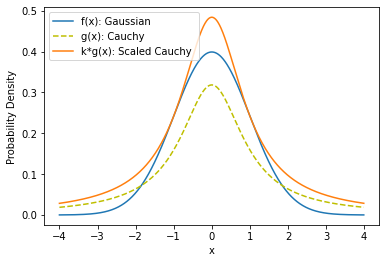

In [318]:


xarr =np.arange(-4,4,0.01)
plt.plot (xarr, funcgauss(xarr), label='f(x): Gaussian ')
plt.plot (xarr, funccauchy(xarr), 'y--', label='g(x): Cauchy ')
plt.plot (xarr, k_m*funccauchy(xarr), label='k*g(x): Scaled Cauchy ')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()


We can exploit the fact that Gaussian distribution is contained within our Scaled Caucgt dist to sample from Gaussian dist. The scheme for the acceptance-rejection algorithm is described below. The average number of samples needed to generate one accepted sample: 2*k ~ 3.04

Points sampled:998


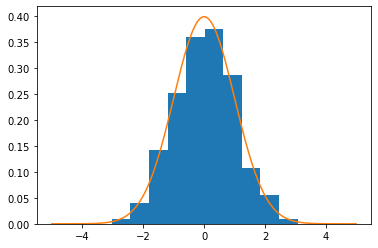

In [319]:
k_m  = funcratio(1)
size= math.ceil(k_m*1000);

z1 =np.zeros(size)
for i in range(size):
     z1[i] = cauchy_rv()
z2 = k_m *funccauchy(z1)*np.random.rand(size)

xarr = np.arange(-5,5,0.01)
plt.hist(z1[z2<=funcgauss(z1)], density=True)
plt.plot(xarr,funcgauss(xarr))
print('Points sampled:' + repr(sum(z2<=funcgauss(z1))))

In [322]:
histtrial = np.zeros(1000)
for j in range(1000):
    size=2000
    z1 =np.zeros(size)
    for i in range(size):
         z1[i] = cauchy_rv()
    z2 = k_m *funccauchy(z1)*np.random.rand(size)
    succ1000 = np.zeros(size)
    succ1000[z2<=funcgauss(z1)] =1
    anss = np.where(abs(np.cumsum(succ1000)-1000)<1e-2)[0]
    histtrial[j]= anss[0]
 

3038.998
3.6257603508949847


The mean and the 95% CI for the number of uniform samples needed is provided below

In [324]:
print(repr(np.mean(2*histtrial)) +'+/-' +repr(2*np.std(2*histtrial, ddof=1)/np.sqrt(1000)))

3038.998+/-3.6257603508949847


## EXTRA STUFF

0.9999999999998181

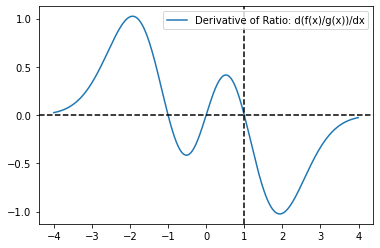

In [247]:
def funcratio_der(x):
    return -np.exp(-x**2/2)*(np.sqrt(np.pi/2))*(x)*(x**2-1)
import scipy.optimize as opt
kx = opt.bisect(funcratio_der,0.2,2)

xarr =np.arange(-4,4,0.01)
plt.plot (xarr, funcratio_der(xarr), label='Derivative of Ratio: d(f(x)/g(x))/dx' )
plt.legend()
plt.axvline(x = kx, color = 'k',linestyle="--",  label = 'kmax=1.315 when x=1')
plt.axhline(y = 0, color = 'k',linestyle="--")
kx

### Ans.